In [76]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')


In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [78]:
df=pd.read_csv('titanic-training-data.csv')

In [79]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [80]:
df.describe()  ## descriptive statistics

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [81]:
df.isnull().sum()  ## for finding missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [82]:
df.shape

(891, 12)

In [83]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [84]:
median1=df['Age'].median()

In [85]:
median1

28.0

In [86]:
df['Age']=df['Age'].replace(np.nan,median1)

In [87]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [88]:
mode1=df['Embarked'].mode().values[0]
mode1

'S'

In [89]:
df['Embarked']=df['Embarked'].replace(np.nan,mode1)

In [90]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

#### Drop insignificant columns

In [91]:
df=df.drop(['Cabin','PassengerId','Ticket','Name'], axis=1)   ## since cabin has many missing values

In [92]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [93]:
duplicate=df.duplicated()        ### checking for duplicate
print(duplicate.sum())          


116


In [94]:
df[duplicate]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
47,1,3,female,28.00,0,0,7.7500,Q
55,1,1,male,28.00,0,0,35.5000,S
76,0,3,male,28.00,0,0,7.8958,S
77,0,3,male,28.00,0,0,8.0500,S
87,0,3,male,28.00,0,0,8.0500,S
95,0,3,male,28.00,0,0,8.0500,S
101,0,3,male,28.00,0,0,7.8958,S
105,0,3,male,28.00,0,0,7.8958,S
121,0,3,male,28.00,0,0,8.0500,S
133,1,2,female,29.00,1,0,26.0000,S


<Axes: xlabel='Age'>

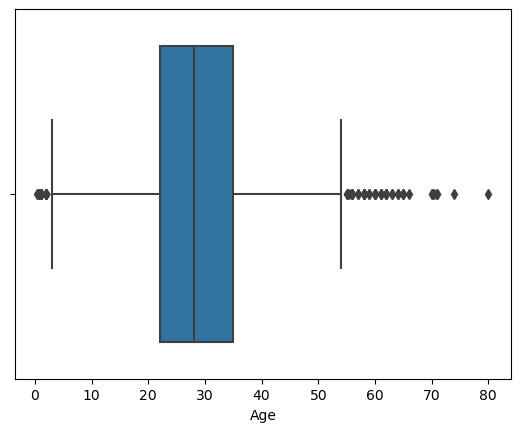

In [95]:
sns.boxplot(x='Age',data=df)

In [96]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [97]:
lowage,uppage=remove_outlier(df['Age'])
df['Age']=np.where(df['Age']>uppage,uppage,df['Age'])
df['Age']=np.where(df['Age']<lowage,lowage,df['Age'])

<Axes: xlabel='Age'>

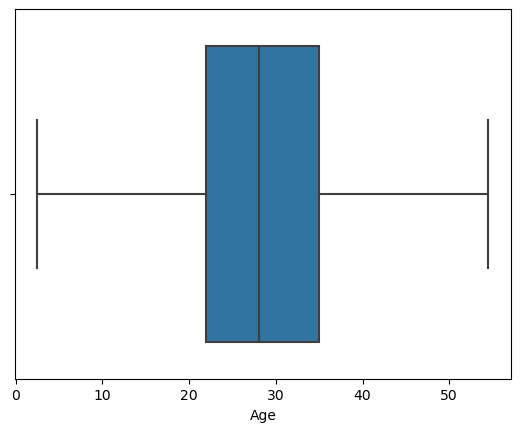

In [98]:
sns.boxplot(x='Age',data=df)

<Axes: xlabel='Fare'>

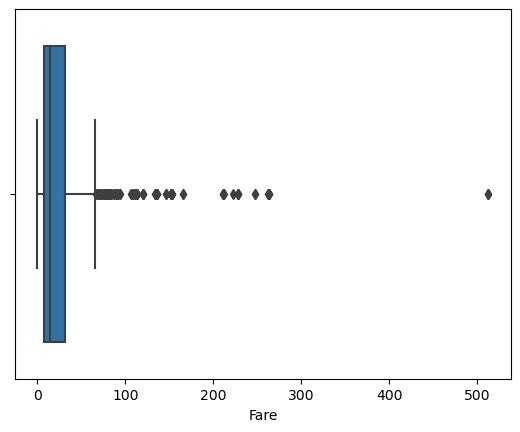

In [99]:
sns.boxplot(x='Fare',data=df)

In [100]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [101]:
lowFare,uppFare=remove_outlier(df['Fare'])
df['Fare']=np.where(df['Fare']>uppFare,uppFare,df['Fare'])
df['Fare']=np.where(df['Fare']<lowFare,lowFare,df['Fare'])

<Axes: xlabel='Fare'>

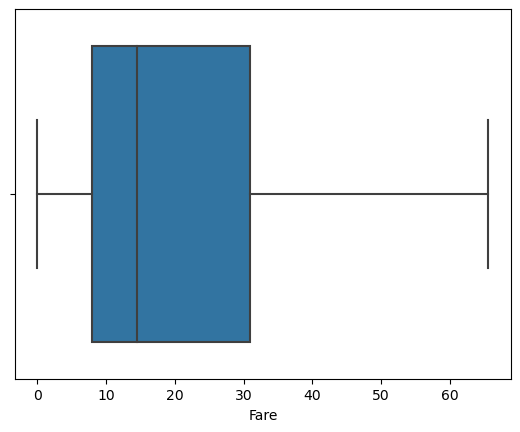

In [102]:
sns.boxplot(x='Fare',data=df)

In [103]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [104]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,65.6344,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [105]:
df=pd.get_dummies(df,columns=['Sex','Embarked'])

In [106]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,1,38.0,1,0,65.6344,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,False,True,False,False,True


### Dataset-2 (Pima Diabetes Dataset)

In [107]:
df=pd.read_csv('pima-indians-diabetes-2.csv')

In [108]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [109]:
df.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [110]:
df.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [111]:
df.isnull().sum()

Preg     0
Plas     0
Pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64

<Axes: xlabel='skin'>

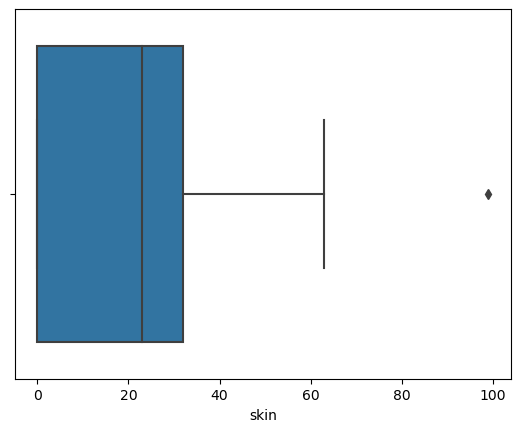

In [112]:
sns.boxplot(x='skin',data=df)

In [113]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [114]:
lowskin,uppskin=remove_outlier(df['skin'])
df['skin']=np.where(df['skin']>uppskin,uppskin,df['skin'])
df['skin']=np.where(df['skin']<lowskin,lowskin,df['skin'])

<Axes: xlabel='skin'>

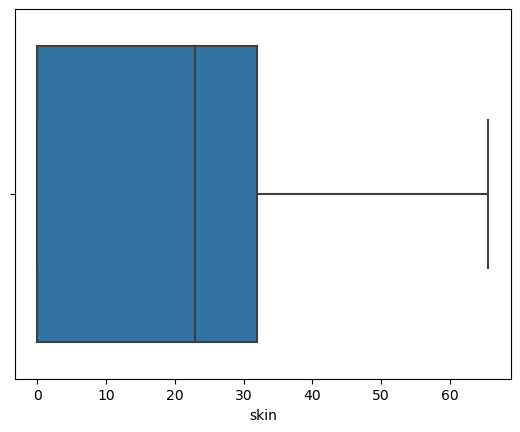

In [122]:
sns.boxplot(x='skin',data=df)

In [116]:
duplicate=df.duplicated()        ### checking for duplicate
print(duplicate.sum()) 

0


<Axes: xlabel='Pres'>

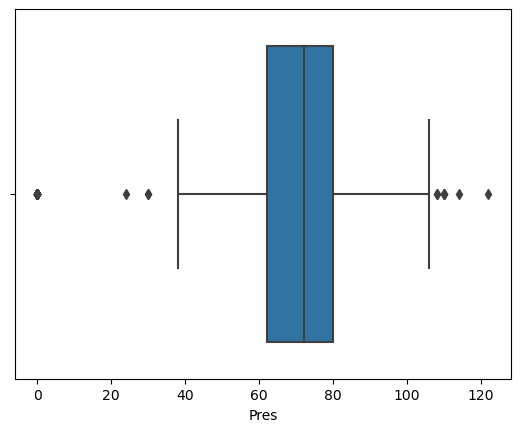

In [117]:
sns.boxplot(x='Pres',data=df)

In [118]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [124]:
lowPres,uppPres=remove_outlier(df['Pres'])
df['Pres']=np.where(df['Pres']>uppPres,uppPres,df['Pres'])
df['Pres']=np.where(df['Pres']<lowPres,lowPres,df['Pres'])

<Axes: xlabel='Pres'>

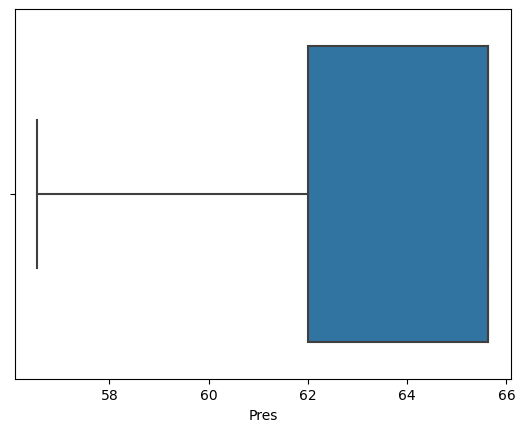

In [125]:
sns.boxplot(x='Pres',data=df)

<Axes: xlabel='Plas'>

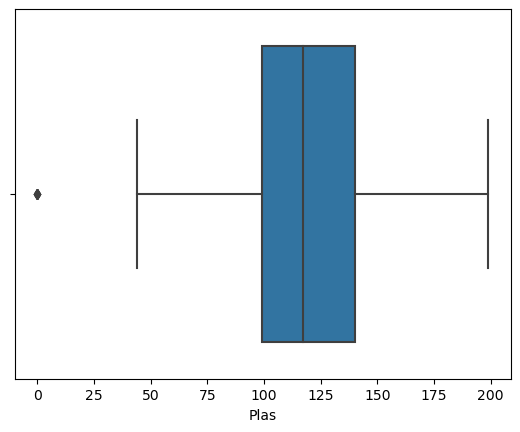

In [126]:
sns.boxplot(x='Plas',data=df)

In [127]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [129]:
lowPlas,uppPlas=remove_outlier(df['Plas'])
df['Plas']=np.where(df['Plas']>uppPlas,uppPlas,df['Plas'])
df['Plas']=np.where(df['Plas']<lowPlas,lowPlas,df['Plas'])

<Axes: xlabel='Plas'>

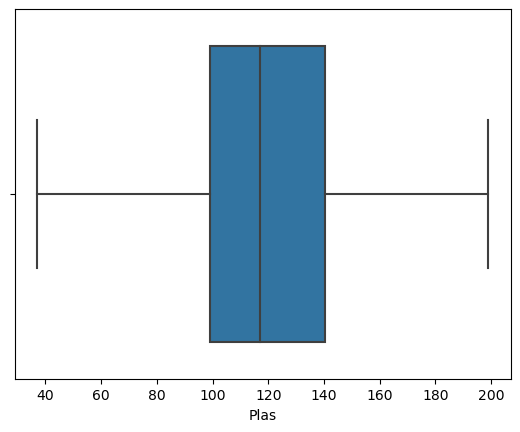

In [130]:
sns.boxplot(x='Plas',data=df)

<Axes: xlabel='Preg'>

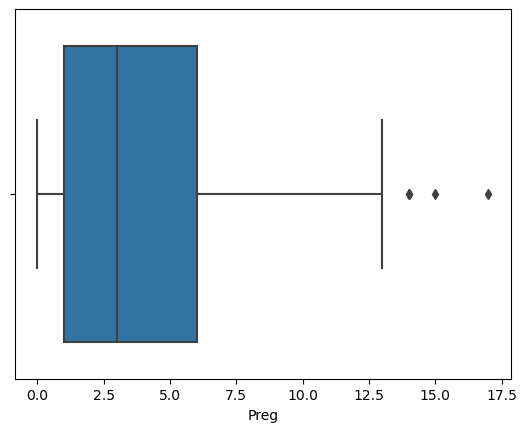

In [131]:
sns.boxplot(x='Preg',data=df)

In [132]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [133]:
lowPreg,uppPreg=remove_outlier(df['Preg'])
df['Preg']=np.where(df['Preg']>uppPreg,uppPreg,df['Preg'])
df['Preg']=np.where(df['Preg']<lowPreg,lowPreg,df['Preg'])

<Axes: xlabel='Preg'>

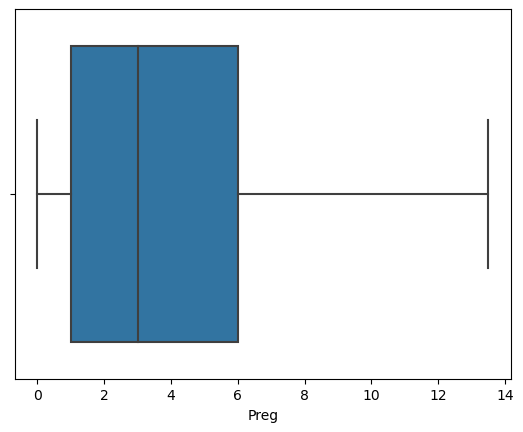

In [134]:
sns.boxplot(x='Preg',data=df)

<Axes: xlabel='test'>

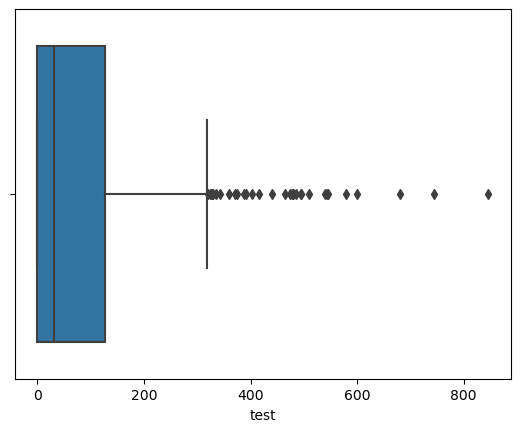

In [135]:
sns.boxplot(x='test',data=df)

In [136]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [137]:
lowtest,upptest=remove_outlier(df['test'])
df['test']=np.where(df['test']>upptest,upptest,df['test'])
df['test']=np.where(df['test']<lowtest,lowtest,df['test'])

<Axes: xlabel='test'>

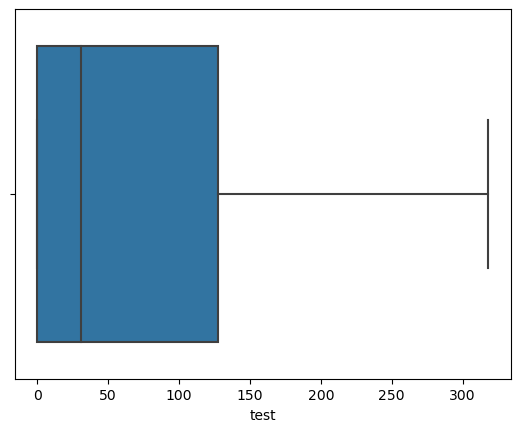

In [138]:
sns.boxplot(x='test',data=df)

<Axes: xlabel='mass'>

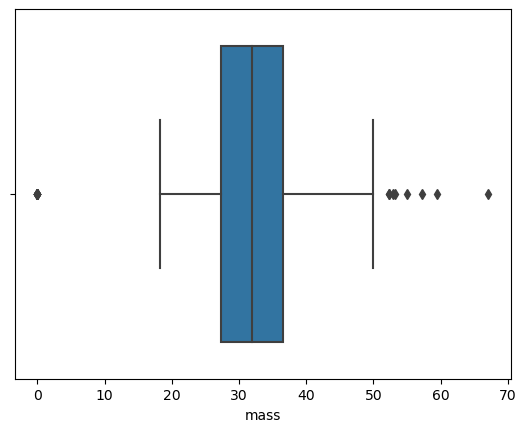

In [139]:
sns.boxplot(x='mass',data=df)

In [140]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [141]:
lowmass,uppmass=remove_outlier(df['mass'])
df['mass']=np.where(df['mass']>uppmass,uppmass,df['mass'])
df['mass']=np.where(df['mass']<lowmass,lowmass,df['mass'])

<Axes: xlabel='mass'>

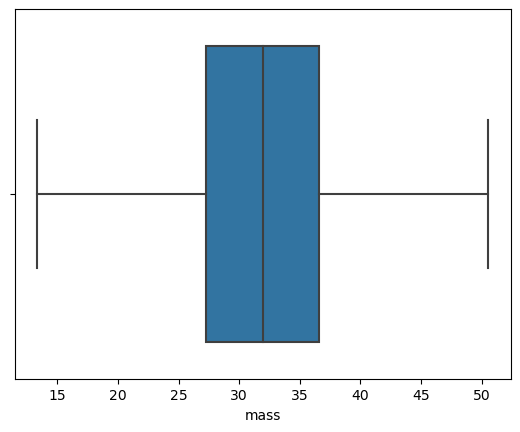

<Axes: xlabel='pedi'>

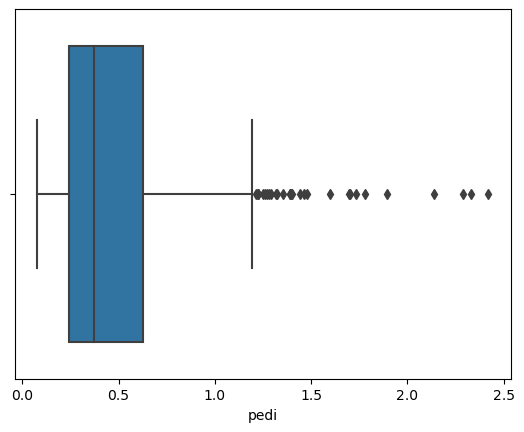

In [143]:
sns.boxplot(x='pedi',data=df)

In [144]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [145]:
lowpedi,upppedi=remove_outlier(df['pedi'])
df['pedi']=np.where(df['pedi']>upppedi,upppedi,df['pedi'])
df['pedi']=np.where(df['pedi']<lowpedi,lowpedi,df['pedi'])

<Axes: xlabel='pedi'>

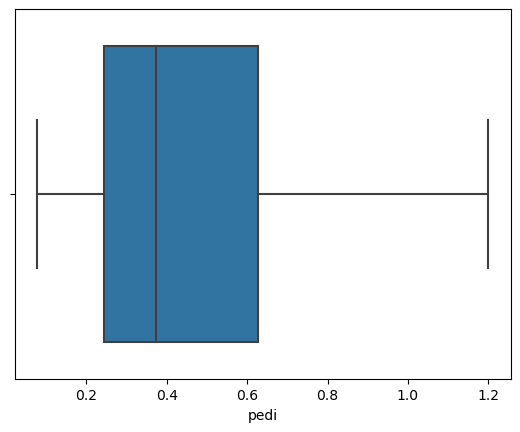

In [146]:
sns.boxplot(x='pedi',data=df)

<Axes: xlabel='age'>

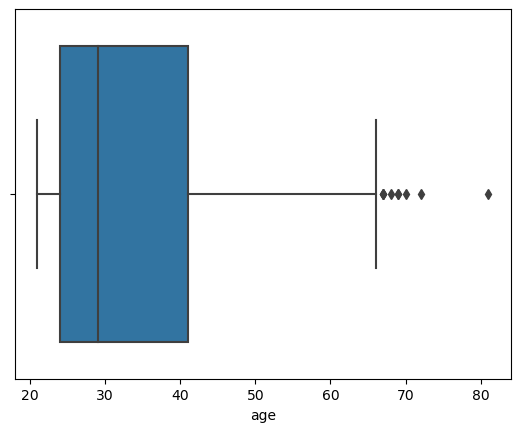

In [147]:
sns.boxplot(x='age',data=df)

In [148]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [151]:
lowage,uppage=remove_outlier(df['age'])
df['age']=np.where(df['age']>uppage,uppage,df['age'])
df['age']=np.where(df['age']<lowage,lowage,df['age'])

<Axes: xlabel='age'>

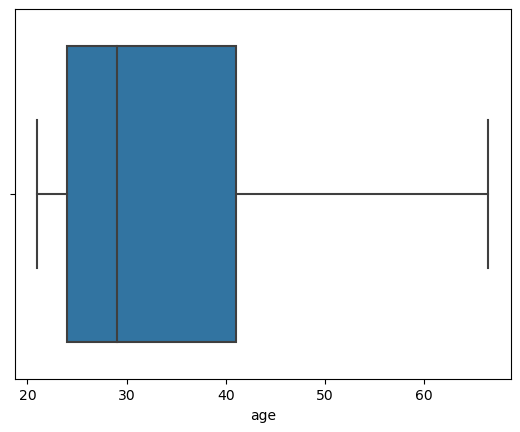

In [152]:
sns.boxplot(x='age',data=df)

<Axes: xlabel='class'>

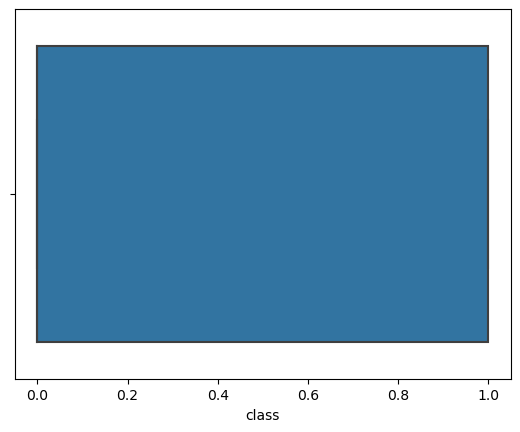

In [153]:
sns.boxplot(x='class',data=df)

In [154]:
df=pd.read_csv('auto-mpg.csv')

In [155]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [156]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [158]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [159]:
df['horsepower']=df['horsepower'].replace(to_replace='?',value=np.nan)
df['horsepower']=df['horsepower'].astype(float)

In [160]:
median1=df['horsepower'].median()

In [161]:
median1

93.5

In [162]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [163]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [164]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<Axes: xlabel='mpg'>

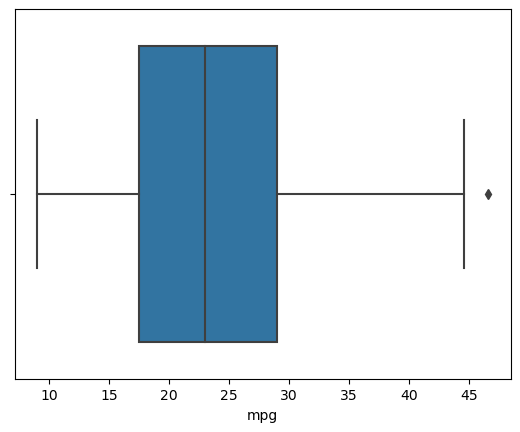

In [165]:
sns.boxplot(x='mpg',data=df)

In [166]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [167]:
lowmpg,uppmpg=remove_outlier(df['mpg'])
df['mpg']=np.where(df['mpg']>uppmpg,uppmpg,df['mpg'])
df['mpg']=np.where(df['mpg']<lowmpg,lowmpg,df['mpg'])

<Axes: xlabel='mpg'>

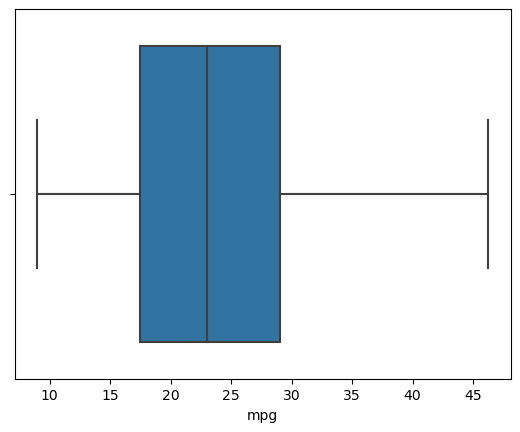

In [168]:
sns.boxplot(x='mpg',data=df)

<Axes: xlabel='cylinders'>

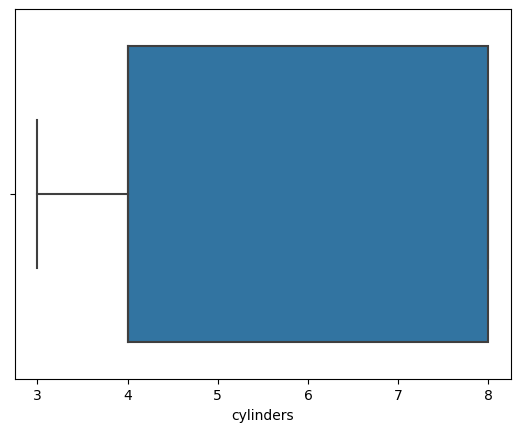

In [169]:
sns.boxplot(x='cylinders',data=df)

<Axes: xlabel='displacement'>

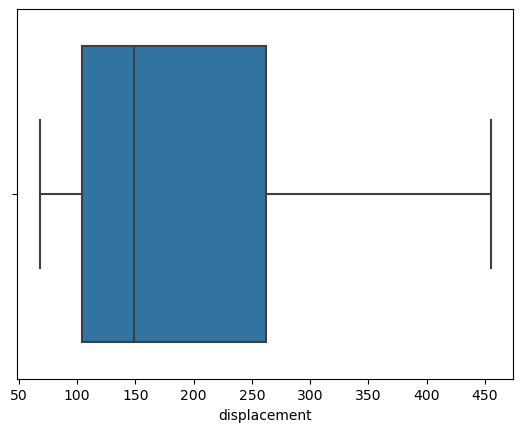

In [170]:
sns.boxplot(x='displacement',data=df)

<Axes: xlabel='horsepower'>

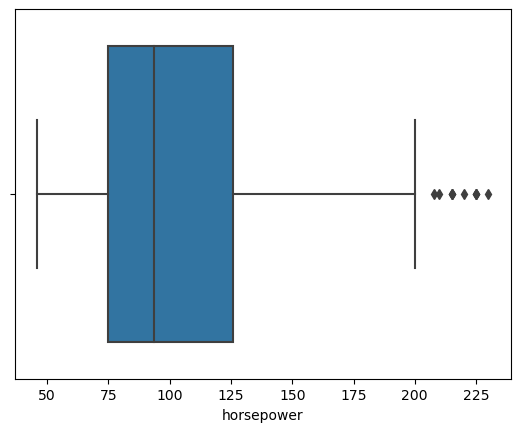

In [171]:
sns.boxplot(x='horsepower',data=df)

In [172]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [173]:
lowhorsepower,upphorsepower=remove_outlier(df['horsepower'])
df['horsepower']=np.where(df['horsepower']>upphorsepower,upphorsepower,df['horsepower'])
df['horsepower']=np.where(df['horsepower']<lowhorsepower,lowhorsepower,df['horsepower'])

<Axes: xlabel='horsepower'>

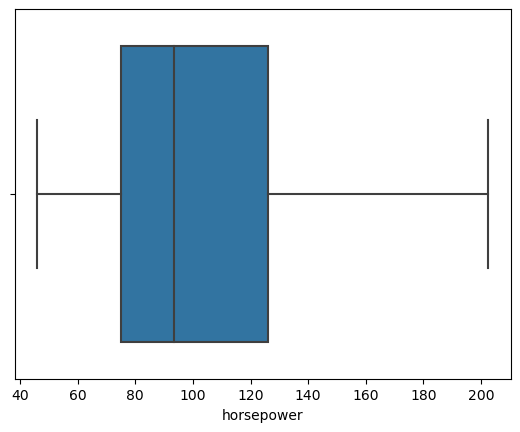

In [174]:
sns.boxplot(x='horsepower',data=df)

<Axes: xlabel='weight'>

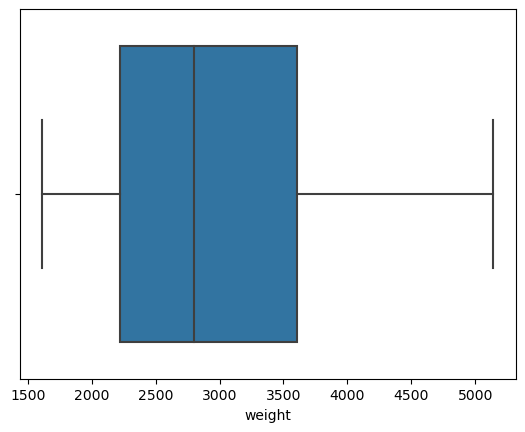

In [175]:
sns.boxplot(x='weight',data=df)

<Axes: xlabel='acceleration'>

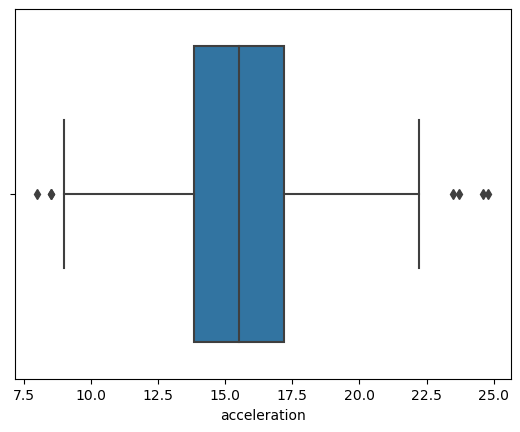

In [176]:
sns.boxplot(x='acceleration',data=df)

In [177]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [178]:
lowacceleration,uppacceleration=remove_outlier(df['acceleration'])
df['acceleration']=np.where(df['acceleration']>uppacceleration,uppacceleration,df['acceleration'])
df['acceleration']=np.where(df['acceleration']<lowacceleration,lowacceleration,df['acceleration'])

<Axes: xlabel='acceleration'>

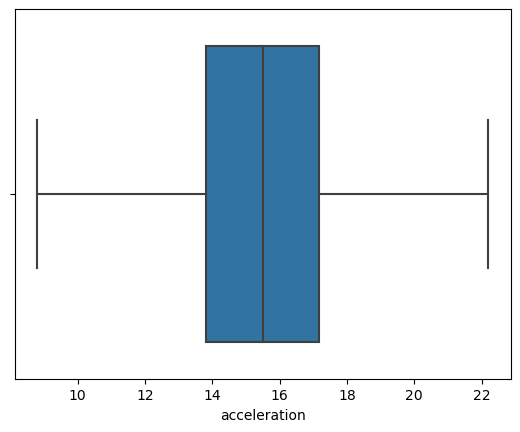

In [179]:
sns.boxplot(x='acceleration',data=df)

<Axes: xlabel='model year'>

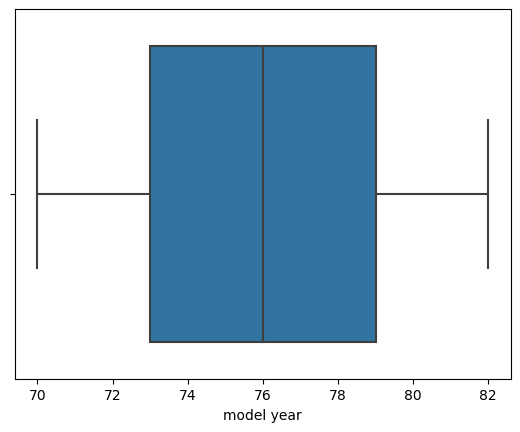

In [180]:
sns.boxplot(x='model year',data=df)

<Axes: xlabel='origin'>

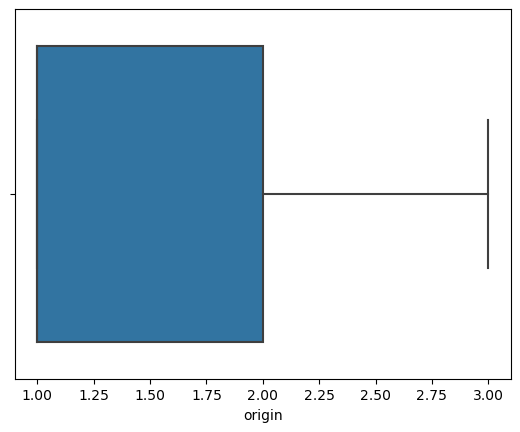

In [181]:
sns.boxplot(x='origin',data=df)

In [182]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
